<h1 align="center" style='font-size: 38px;'>
Five Decades of Hit Songs
</h1>

<table>
    <tr>
        <td> <img src="https://images.aftonbladet-cdn.se/v2/images/1c1ada48-1a7e-430b-a69e-9e88053bde8a?fit=crop&format=auto&h=1322&q=50&w=1900&s=19ad0477d4ef399c9c6cbce5aad6faf15383435f" alt="Abba" style="width: 270px;"/> </td>
        <td> <img src="https://www.billboard.com/wp-content/uploads/media/06-U2-timeline-billboard-1548.jpg?w=1024" alt="U2" style="width: 270px;"/> </td>
        <td> <img src="https://cdn.britannica.com/02/162002-050-02512608/Tupac-Shakur-1993.jpg" alt="2Pac" style="width: 270px;"/> </td>
        <td> <img src="https://www.rollingstone.com/wp-content/uploads/2022/12/britney-spears-2000.jpg?w=831&h=554&crop=1" alt="Britney Spears" style="width: 270px;"/> </td>
        <td> <img src="https://djmagmx.com/wp-content/uploads/2018/01/calvinharris.jpg" alt="Calvin Harris" style="width: 270px;"/> </td>
    </tr>
</table>


<p style='text-align: center; font-size: 18px; font-style: italic;'> 
I'm diving into the top hits from 1970 to 2019 to see how music has evolved over time. <br>
Using data from Spotify, I'll explore how musical trends have moved with culture and technology. <br>
From the 1970s to today's tracks, let's discover what has shaped peoples vinyl stacks, CD collections, and playlists. 
</p>

***

# 1. Introduction


Music is more than just melodies and rhythms. It's a reflection of society, evolving with cultural shifts and technological advancements in both music production and how we consume music.<br>
My goal with this analysis is two-folded. First I want to dig deeper into the spotify hit lists over the years and look into any major shifts throughout the decades. Second I want to have a look at modern hits and see if it is possible to learn what is needed to create a hit song today.<br>

Before I dive into this, I want to have set up my environment and do some exploration with the data

***

# 2. Setting up the environment

I will primarily be using pandas for data manipulation and matplotlib/seaborn for visualisations. I might import additional libraries later on if needed.

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv('../data/top_hits_1970_to_2019_cleaned.csv') # import data

### 2.1 Data overview

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4997 non-null   object 
 1   artist            4997 non-null   object 
 2   popularity        4997 non-null   int64  
 3   explicit          4997 non-null   bool   
 4   energy            4997 non-null   float64
 5   tempo             4997 non-null   float64
 6   positiveness      4997 non-null   float64
 7   danceability      4997 non-null   float64
 8   acousticness      4997 non-null   float64
 9   loudness          4997 non-null   float64
 10  mode              4997 non-null   object 
 11  duration_minutes  4997 non-null   float64
 12  key               4997 non-null   object 
 13  album_name        4997 non-null   object 
 14  year              4997 non-null   int64  
dtypes: bool(1), float64(7), int64(2), object(5)
memory usage: 551.6+ KB


In [157]:
df.head(5)

,name,artist,popularity,explicit,energy,tempo,positiveness,danceability,acousticness,loudness,mode,duration_minutes,key,album_name,year
0,Let It Be - Remastered 2009,The Beatles,79,False,0.403,143.462,0.410,0.443,0.6310,-8.339,Major,4.1,C,Let It Be (Remastered),1970
1,Cecilia,Simon & Garfunkel,76,False,0.876,102.762,0.954,0.755,0.3570,-8.867,Major,2.9,C,Bridge Over Troubled Water,1970
2,Son of a Preacher Man,Aretha Franklin,38,False,0.473,77.583,0.561,0.474,0.5450,-11.454,Major,3.3,D,The Queen Of Soul,1970
3,Who'll Stop The Rain,Creedence Clearwater Revival,65,False,0.797,123.566,0.622,0.598,0.0424,-6.793,Major,2.5,G,Cosmo's Factory (Expanded Edition),1970
4,I Want You Back,The Jackson 5,80,False,0.538,196.605,0.886,0.469,0.3050,-13.559,Major,2.9,Gsharp/Aflat,Diana Ross Presents The Jackson 5,1970


### 2.2 Data dictionairy

- **name** - Name of the song
- **artist** - Name of the artist
- **popularity** - The popularity of a track is a value between 0 and 100, with 100 being the most popular
- **explicit** - If the song is explicit (True), or not (False)
- **energy** - Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity
- **tempo** - Bpm of song (Beats per minute)
- **positiveness** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
- **danceability** - Describes how suitable a track is for dancing based on a combination of musical elements
- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic
- **loudness** - The overall loudness of a track in decibels (dB)
- **mode** - Indicates the modality (major or minor) of a track
- **duration_minutes** - Duration of the track in minutes
- **key** - The key the track is in (C, Csharp, etc)
- **album_name** - Name of the album
- **year** - What year the song was released

***

# 3. Exploring the data

In [158]:
columns_to_count = ['name', 'artist', 'album_name']

# count unique song names, artist names, album names
for col in columns_to_count:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

name: 4658 unique values
artist: 1938 unique values
album_name: 3521 unique values


So this dataset contains 4658 unique song names, coming from 1938 different artists and spread across 3521 albums.
Seems like a good spread!<br>Unfortunately it was not possible to get the genres of the songs from the API. Neither have I been able to get a hold of any lyrics for the tracks.

Let's have a look at some of the attributes in the dataset. For the linecharts, I will be using moving averages with a window of five years to smoothen out the curves and give a better overview of the data.

### 3.1 Energy, positiveness, and danceability over time

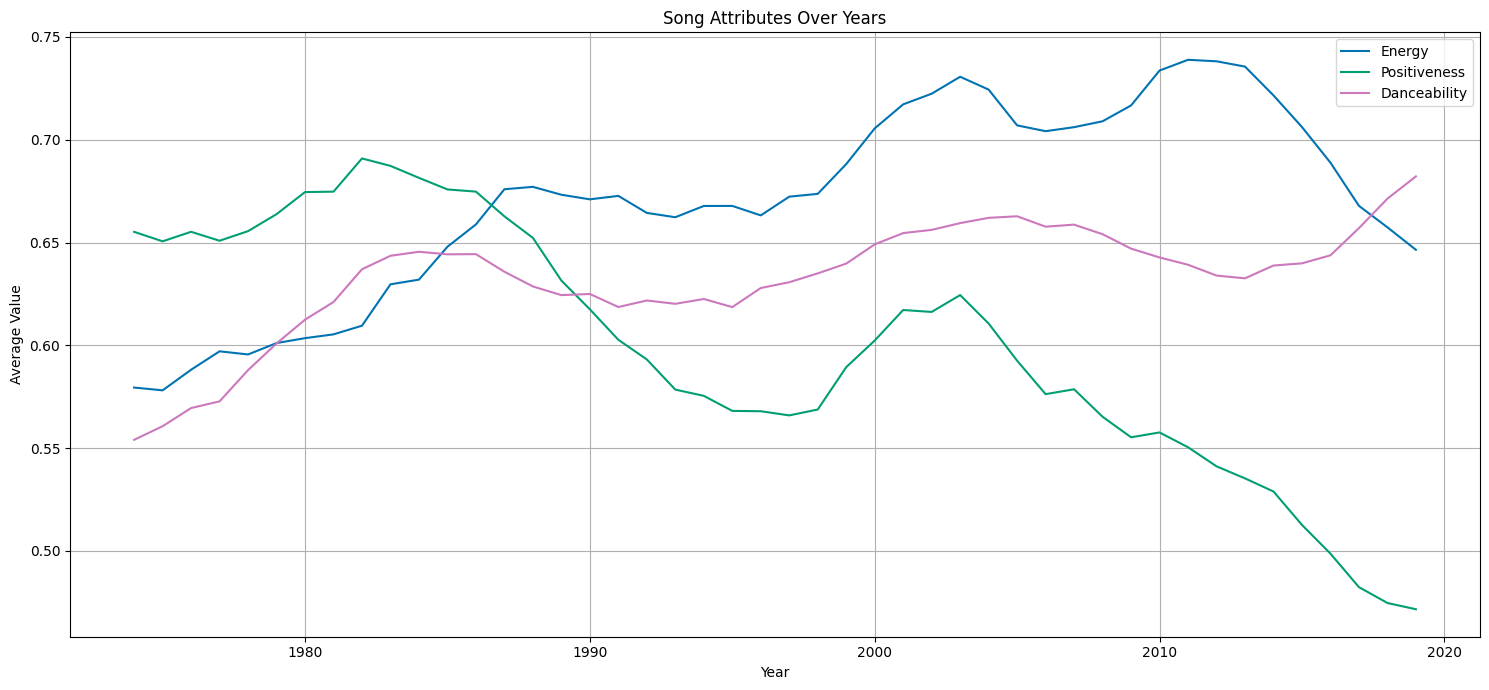

In [159]:
columns_attr_linechart = ['energy', 'positiveness', 'danceability']

# group data by year and calculate mean for each column
grouped_data_attr = df.groupby('year')[columns_attr_linechart].mean()

# 5 year rolling average (fair?)
window_size = 5  

# get moving average of columns
grouped_data_attr = grouped_data_attr.rolling(window=window_size).mean()


plt.figure(figsize=(15, 7))

# set line colors from colorblind palette
line_colors = sns.color_palette("colorblind", 8)

# plot moving averages of attributes (loop this)
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='energy', label='Energy', color=line_colors[0])
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='positiveness', label='Positiveness', color=line_colors[2])
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='danceability', label='Danceability', color=line_colors[4])

# set title and labels
plt.title('Song Attributes Over Years')
plt.ylabel('Average Value')
plt.xlabel('Year')

# display legend and grid lines
plt.legend()
plt.grid(True)

# adjust layout
plt.tight_layout()

# show plot
plt.show()

- **Energy**: The energy of songs has steadily rised since the 70s and peaking somewhere just after 2010. There is a small decline post 2010 but nothing too crazy. <br>
- **Positiveness**: Over the years, it looks like songs are getting more negative except for a small peak around 2000. <br>
- **Danceability**: There seem to have been a slow rise in danceability over time, with a small upwards trend starting around mid 2015. Interestingly enough, the energy and positiveness of songs are going down at the same period.

### 3.2 Acousticness and Loudness

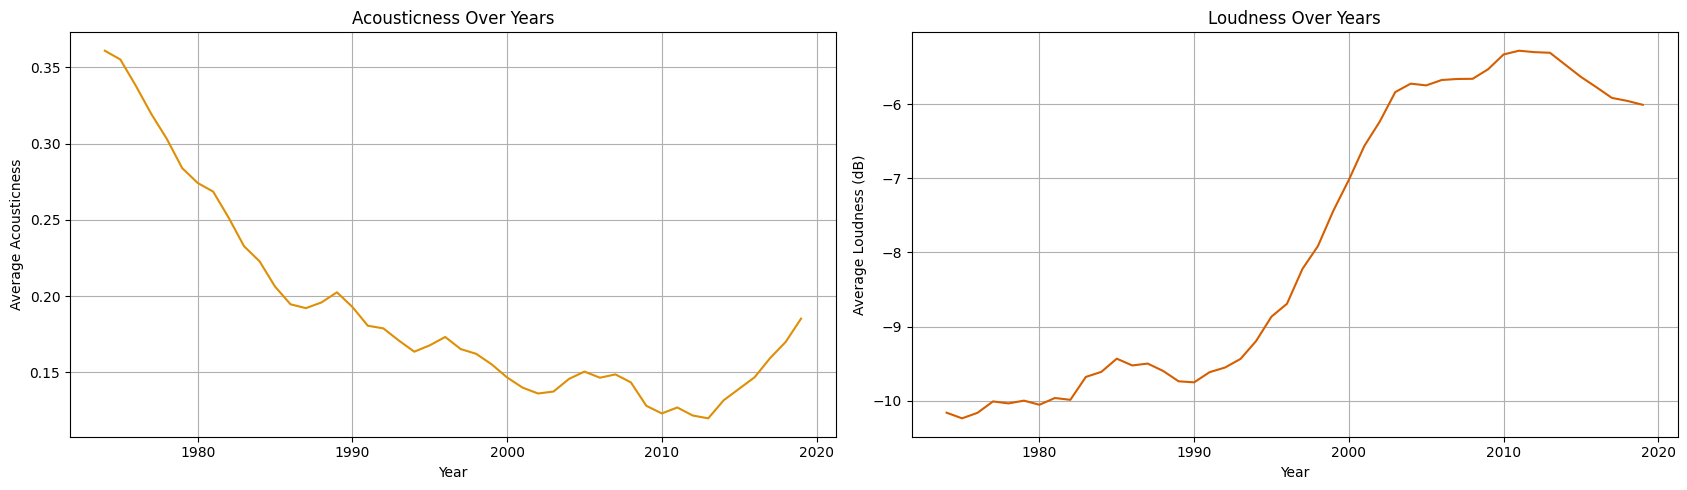

In [160]:
window_size = 5  
# MAKE FUNCTION FOR THE MOVING AVERAGE CALCS (DRY)

# group data by year and get mean for acousticness
grouped_data_acous = df.groupby('year')[['acousticness']].mean()

# calc moving avg of acousticness
grouped_data_acous['acousticness_moving'] = grouped_data_acous['acousticness'].rolling(window=window_size).mean()

# group data by year and get mean for loudness
grouped_data_loud = df.groupby('year')[['loudness']].mean()

# calc moving average for loudness
grouped_data_loud['loudness_moving'] = grouped_data_loud['loudness'].rolling(window=window_size).mean()


plt.figure(figsize=(17, 5))

# acousticness plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot (think css grid)
sns.lineplot(data=grouped_data_acous, x=grouped_data_acous.index, y='acousticness_moving', color=line_colors[1])
plt.title('Acousticness Over Years')
plt.ylabel('Average Acousticness')
plt.xlabel('Year')
plt.grid(True)

# loudness plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot (think css grid)
sns.lineplot(data=grouped_data_loud, x=grouped_data_loud.index, y='loudness_moving', color=line_colors[3])
plt.title('Loudness Over Years')
plt.ylabel('Average Loudness (dB)')
plt.xlabel('Year')
plt.grid(True)


plt.tight_layout()
plt.show()

- **Acousticness**: Songs used to have more acoustic elements in the 70s. This has decreased until just after 2010. Maybe a return to more "real" instruments in hit songs?<br>
- **Loudness**: Songs have been getting louder over time, peaking around 2010. But after that it seems to be going down, could this be a reaction to the infamous loudness war?

### 3.3 Explicit, Mode, and Key

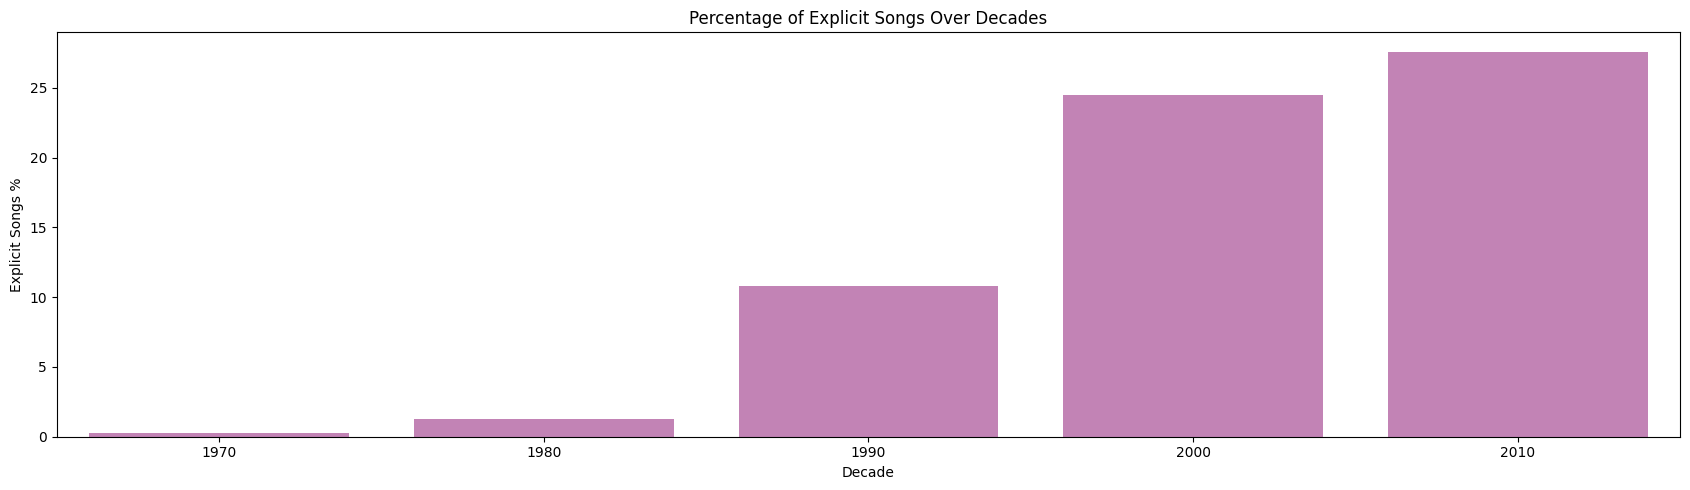

In [161]:
# set decades instead of years (cleaner)
decades = (df['year'] // 10) * 10

# filter dataframe for explicit songs, count for every decade
explicit_counts = df[df['explicit']].groupby(decades).size() # will only store True values

# set percentage
total_counts = df.groupby(decades).size()
explicit_counts_percentage = (explicit_counts / total_counts) * 100

# convert series to df
df_percentage = explicit_counts_percentage.reset_index()
df_percentage.columns = ['decade', 'explicit_percentage']

# get color from the colorblind palette
pink_color = sns.color_palette("colorblind", 8)[4]

# barplot of explicit percentage
plt.figure(figsize=(17, 5))
sns.barplot(x='decade', y='explicit_percentage', data=df_percentage, color=pink_color)

plt.title('Percentage of Explicit Songs Over Decades')
plt.ylabel('Explicit Songs %')
plt.xlabel('Decade')

plt.tight_layout()
plt.show()

- **Explicit**: The first two decades from the dataset has barely any explicit hits. But something changed in the 90s, and after that, explicit hits are far more common.

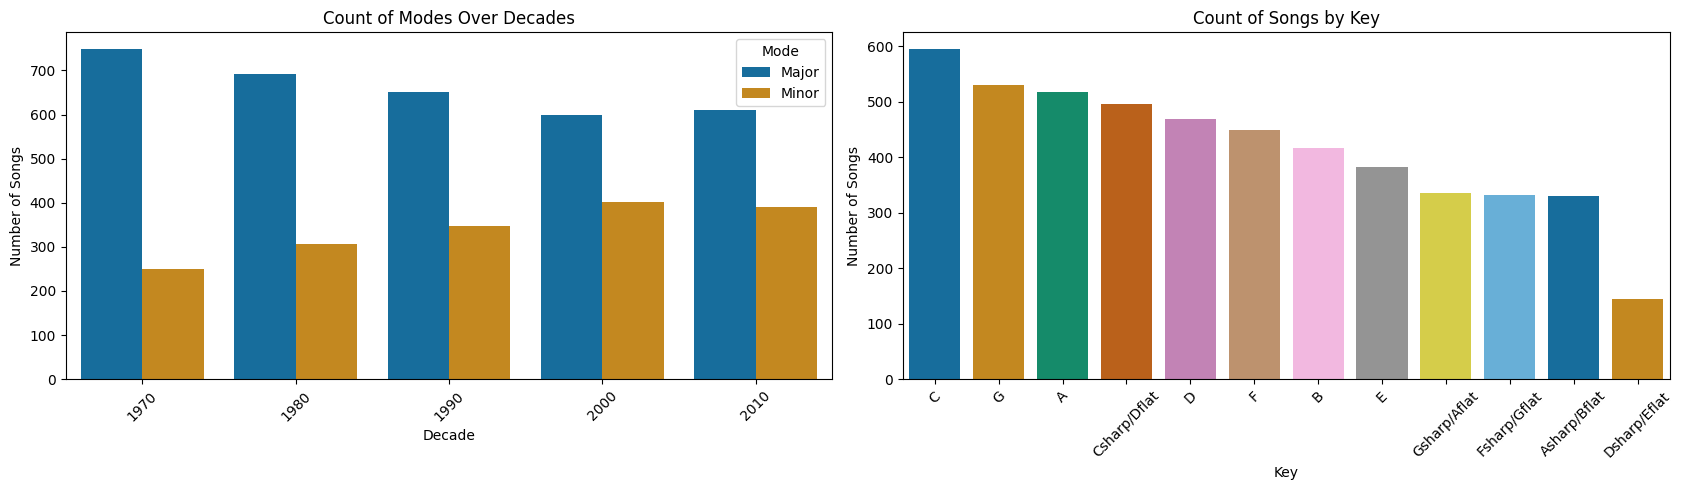

In [162]:
# group by decades and mode, count for each decade
mode_counts = df.groupby([decades, 'mode']).size().reset_index(name='counts')

# count each key in the dataset
key_counts = df['key'].value_counts()

plt.figure(figsize=(17, 5))

# barplot of modes
plt.subplot(1, 2, 1)
sns.barplot(x='year', y='counts', hue='mode', data=mode_counts, palette="colorblind")
plt.title('Count of Modes Over Decades')
plt.ylabel('Number of Songs')
plt.xlabel('Decade')
plt.xticks(rotation=45)
plt.legend(title='Mode')

# barplot of keys
plt.subplot(1, 2, 2)
sns.barplot(x=key_counts.index, y=key_counts.values, order=key_counts.index, palette="colorblind")
plt.title('Count of Songs by Key')
plt.xlabel('Key')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

- **Mode**: Major songs are becoming less common over the decades.<br>
- **Key**: C is the reigning champion, but other keys are not that far behind. Dsharp/Eflat seems to be the underdog.

### 3.4 Tempo and Duration

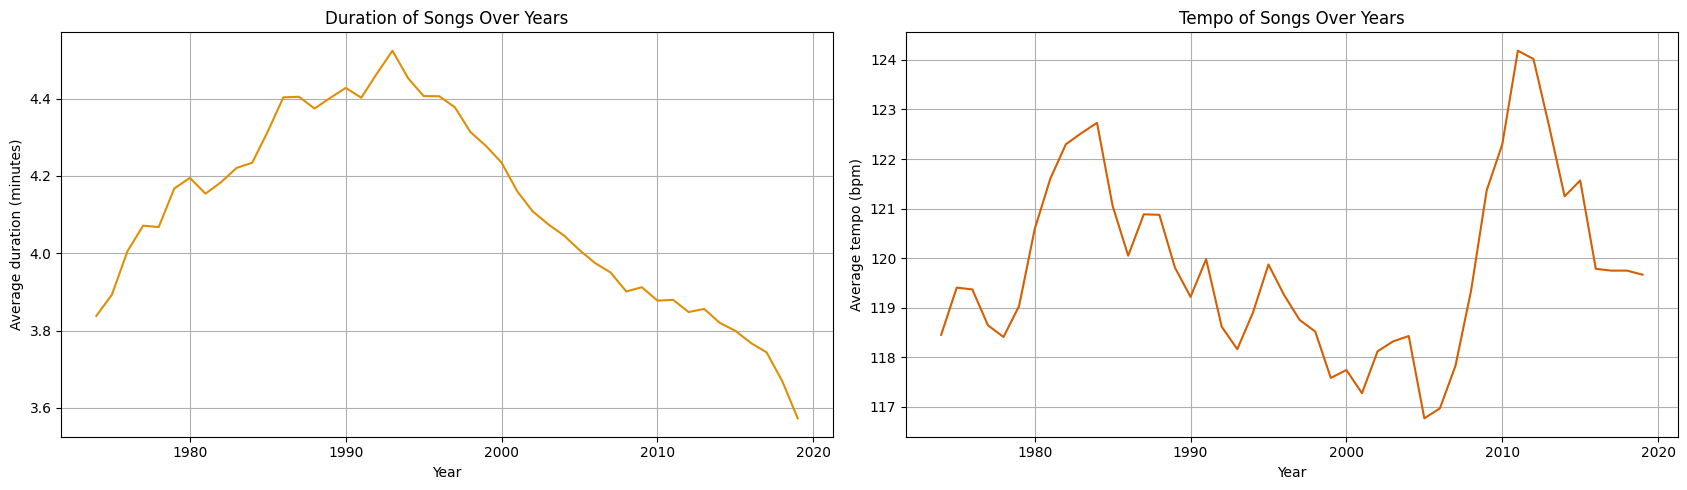

In [163]:
window_size = 5  
# MAKE FUNCTION FOR THE MOVING AVERAGE CALCS (DRY)

# group data by year and get mean for duration
grouped_data_dur = df.groupby('year')[['duration_minutes']].mean()

# calc moving avg of duration
grouped_data_dur['duration_moving'] = grouped_data_dur['duration_minutes'].rolling(window=window_size).mean()

# group data by year and get mean for tempo
grouped_data_tempo = df.groupby('year')[['tempo']].mean()

# calc moving average for loudness
grouped_data_tempo['tempo_moving'] = grouped_data_tempo['tempo'].rolling(window=window_size).mean()


plt.figure(figsize=(17, 5))

# duration plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot (think css grid)
sns.lineplot(data=grouped_data_dur, x=grouped_data_dur.index, y='duration_moving', color=line_colors[1])
plt.title('Duration of Songs Over Years')
plt.ylabel('Average duration (minutes)')
plt.xlabel('Year')
plt.grid(True)

# tempo plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot (think css grid)
sns.lineplot(data=grouped_data_tempo, x=grouped_data_tempo.index, y='tempo_moving', color=line_colors[3])
plt.title('Tempo of Songs Over Years')
plt.ylabel('Average tempo (bpm)')
plt.xlabel('Year')
plt.grid(True)


plt.tight_layout()
plt.show()

- **Duration**: Songs seem to have gotten longer until the mid 90s. What caused them to shorten after this? New technologies / Platforms?<br>
- **Tempo**: The tempo of songs seems to slowly down from the mid 80s. Even though it looks like it's varying a lot it's actually not much happening until just after 2010 where there is a major peak followed by a steep curve downwards.

***

# 4. Historical trends in hit music

After having a look at the exploratory part of this analysis, it is clear that music, just like culture, evolves over time. <br>
Some of these trends has caught my attention more than other which is why I want to investigate them further in this chapter. <br>
Specifically, I want to look deeper into:
- **4.1 The shortening of songs since the 90s:** *Why are hit songs getting shorter?*
- **4.2 The emotional tone of songs:** *Are hit songs becoming more negative? Exploring the mode, explicitness, and positiveness trends.*
- **4.3 The Impact of the Loudness War:** *Analysing loudness and acousticness in hit songs.*

### 4.1 The shortening of songs since the 90s

Song durations have seen a shift over the decades. While songs got longer up to the 1990s, there's been a noticeable drop since then.

GRAPHS HERE

**Digital platforms take over** <br>
Before the 2000s, vinyls and CDs allowed artists more freedom with song length. But as platforms like Spotify emerged, shorter songs became advantageous. They're streamed more frequently, leading to better chart positions and earnings.

**Radio preferences** <br>
Historically, radio favored shorter tracks, potentially influencing artists to produce more concise songs for increased airplay.

**Short-form content** <br>
With the rise of the digital age, there's some evidence to suggest that attention spans have shortened. Additionally, the popularity of short video platforms like TikTok, Instagram reels, and YouTube Shorts has amplified the demand for brief, catchy song hooks that resonate quickly with viewers.

*sources*

### 4.2 The emotional tone of songs

Music changes as society does. Looking at songs from 1970 to 2019, there are some clear trends:

GRAPHS HERE

**Rise of minor modes**<br>
Songs in minor modes, which often evoke deeper, more introspective emotions, grew from about 250 in 1970 to around 400 by 2019. This might suggest a cultural tilt towards more profound or reflective themes in music over the years.

**Explicit lyrics gain ground**<br>
Before the 90s, explicit content in songs was uncommon. Its notable rise post-90s can be attributed to:<br>
- Genre Evolution: The prominence of genres like hip-hop, known for its raw narratives and social commentaries.
- Digital Freedom: Streaming platforms like Spotify bypass traditional radio restrictions, giving artists a canvas for unrestricted expression.

**A downwards trend in positiveness** <br>
Songs have become less positive. This might reflect the challenges and complexities of our modern world. As people face ups and downs, the music they connect with changes too.



*sources*

### 4.3 The Impact of the Loudness War

The "Loudness War" refers to the trend of increasing audio levels in music over the years, a phenomenon driven by the desire to have one's music sound "louder" than others when played on radio or streaming platforms. This has implications not just for how music sounds but also how it's produced. Diving into the acousticness and loudness of songs provides insights into this phenomenon.

GRAPHS HERE

**The decline and resurgence of acousticness**<br>
Starting in 1970, the acousticness of songs trended downwards, reaching its lowest around 2010. Post-2010, however, there's been a resurgence, indicating a possible return to more organic and less processed sounds. This could be attributed to:

- Digital Fatigue: As listeners become overwhelmed with heavily processed tracks, there's a growing appreciation for more natural, acoustic sounds.
- Technological Advances: Modern recording equipment can capture the nuances of acoustic instruments with greater fidelity, making them more appealing to artists and producers.

**Amplifying loudness**<br>
There's a sharp increase in song loudness from the 90s to 2010. This aligns with the peak of the "Loudness War", where tracks were mastered at higher volumes to stand out. However, post-2010, there's a decline, possibly due to:

- Streaming Platforms: Services like Spotify and Apple Music have normalization features, reducing the need for tracks to be overly loud.
- Listener Preferences: Excessively loud mastering can lead to listener fatigue. As audiences become more discerning, there's a shift towards tracks with more dynamic range.


*sources*

***

# 5. Modern Hit Music

### 5.1 What makes a modern song a hit?

I want to know if it is possible to see what makes a modern track popular, by only looking at the features from the Spotify API.<br>
To achieve this, first of all I am creating a new dataset with all the albums from the 2019 hit list to have a wider range of popularity in the tracks.<br>
This dataset contains around 800 songs which will be enough for this part of the analysis.

In [178]:
album_df = pd.read_csv('../data/modern_albums_cleaned.csv')

#### 5.11 Popularity distrubution
Lets start of by having a look at the popularity distrubution

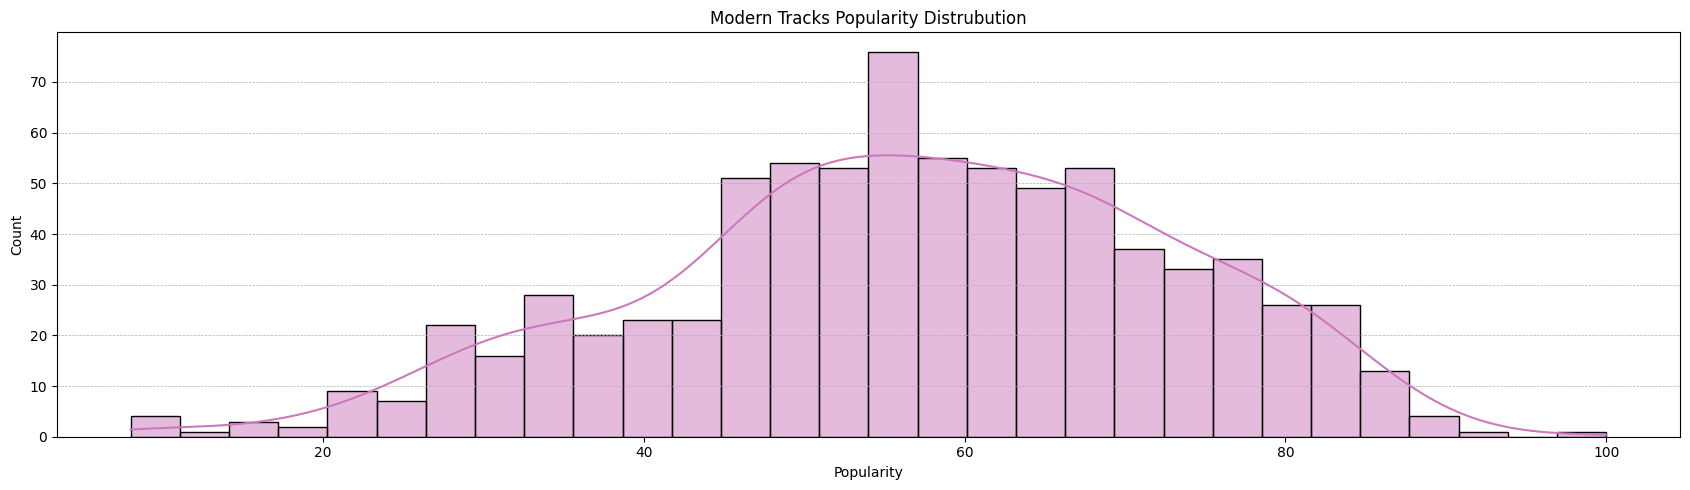

In [177]:
# get color from the colorblind palette
pink_color = sns.color_palette("colorblind", 8)[4]

plt.figure(figsize=(17, 5))
sns.histplot(album_df['popularity'], bins=30, color=pink_color, kde=True)
plt.title('Modern Tracks Popularity Distrubution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

The histogram above shows two things: <br>
- Most of the scores range between 50 and 70 in popularity.
- The distrubution is slightly skewed to the left, which basically means there are some high scores in this new dataset, just not as many as before.<br>

This is what I was looking for when I created this dataset, to have more spread on popularity but still keep some higher scores in there.

#### 5.12 Danceability and Energy VS Popularity
Next up, I want to see if there is any relationship between danceability/energy and popularity.

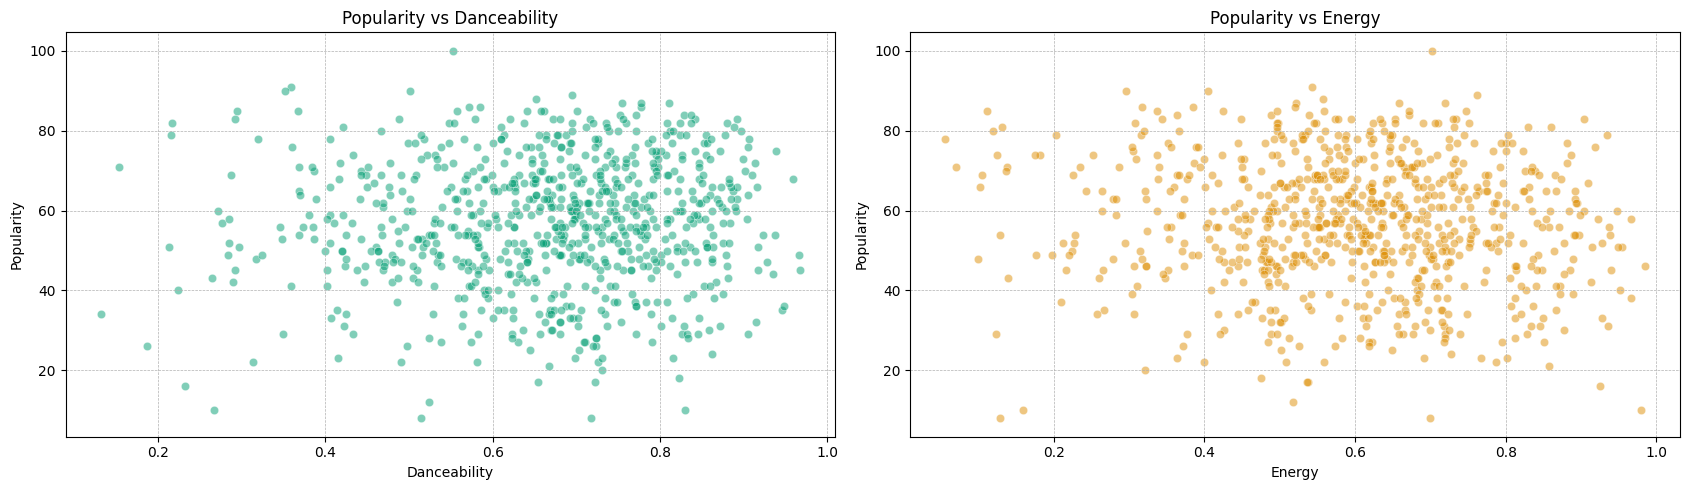

In [190]:
plt.figure(figsize=(17, 5))

# get color from the colorblind palette
green_color = sns.color_palette("colorblind", 8)[2]
yellow_color = sns.color_palette("colorblind", 8)[1]

# danceability vs popularity scatter
plt.subplot(1, 2, 1) 
sns.scatterplot(data=album_df, x='danceability', y='popularity', alpha=0.5, color=green_color)
plt.title('Popularity vs Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# energy vs popularity scatter
plt.subplot(1, 2, 2)
sns.scatterplot(data=album_df, x='energy', y='popularity', alpha=0.5, color=yellow_color)
plt.title('Popularity vs Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

- **Popularity vs Danceability**: There is quite a broad spread here that indicates that songs with both high and low danceability can score high in popularity. However, many of the popular songs seem to cluster a little bit more to the higher danceability scores.
- **Popularity vs Danceability**: A bit more spread out here, indicating a little bit towards higher energy = more popularity, but it's hard to tell.<br>

The biggest finding in these two scatter plots is that Spotify score danceability and energy very close to eachother, which make sense when you think about it.

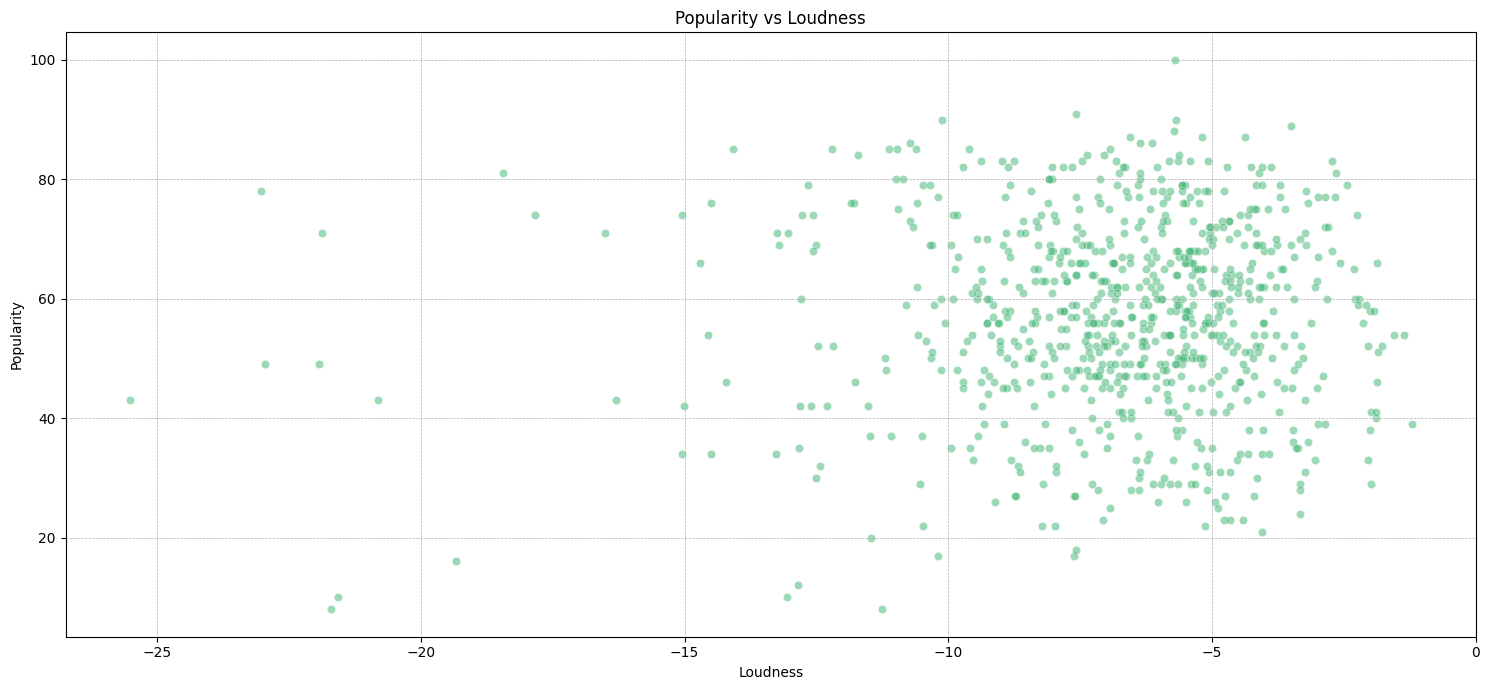

In [194]:
plt.figure(figsize=(15, 7))

# acousticness vs popularity scatter
sns.scatterplot(data=album_df, x='loudness', y='popularity', alpha=0.5, color='mediumseagreen')
plt.title('Popularity vs Loudness')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()